In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=7
currency_pair = 'CAD=X'
numbers_in_currency = 'CAD'
share_name = 'FTS.TO'

# 1.2. Raw input statement data

In [3]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../csv_files/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,1999-03-31,144,0,144,11,4,59,6,80,41,...,1028,0,5,0,131,427,687,35,-16,13
1,1999-06-30,121,0,121,8,4,54,7,75,40,...,1025,0,9,0,126,425,681,16,-17,13
2,1999-09-30,105,0,105,5,9,45,7,61,40,...,1047,0,14,0,128,439,704,32,-44,13
3,1999-12-31,135,0,135,6,11,64,17,92,39,...,1239,0,93,11,230,538,895,2,-10,13
4,2000-03-31,166,0,166,11,11,68,17,96,38,...,1329,0,173,15,316,485,978,23,-19,14


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
95,2022-12-31,2023-02-11,488,3168,-1268,1900,420,209,1759,661,...,1548,64252,0,253,2481,6617,25931,43222,869,-1114
96,2023-03-31,2023-04-21,490,3319,-1312,2007,484,576,1876,569,...,1511,64630,0,361,2362,6150,26466,43363,915,-954
97,2023-06-30,2023-07-21,490,2594,-787,1807,346,690,1580,534,...,1492,64081,0,80,2284,5414,26808,42702,944,-982
98,2023-09-30,2023-10-21,490,2719,-773,1946,445,765,1648,588,...,1515,66285,0,78,2774,6368,27170,44593,940,-983
99,2023-12-31,2024-02-11,490,2885,899,1986,435,625,1627,566,...,1510,65920,0,119,2296,5964,27235,42588,746,-1250


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

CAD=X: Data doesn't exist for startDate = 915062400, endDate = 922834800
/Users/zsolt.nagy/Desktop/projects/Economy/notebooks/value_investing/notebooks/utils.ipynb:68: RuntimeWarning: Mean of empty slice.
  "    return filtered"
/Users/zsolt.nagy/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
CAD=X: Data doesn't exist for startDate = 922921200, endDate = 930697200
/Users/zsolt.nagy/Desktop/projects/Economy/notebooks/value_investing/notebooks/utils.ipynb:68: RuntimeWarning: Mean of empty slice.
  "    return filtered"
/Users/zsolt.nagy/Desktop/projects/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
CAD=X: Data doesn't exist for startDate = 930870000, endDate = 938646000
/Users/zsolt.nagy/Desktop/projects/Economy/notebooks/value_investing/notebooks/ut

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
95,2022-12-31,2023-02-11,488,3168,-1268,1900,420,209,1759,661,...,64252,0,253,2481,6617,25931,43222,869,-1114,1.357405
96,2023-03-31,2023-04-21,490,3319,-1312,2007,484,576,1876,569,...,64630,0,361,2362,6150,26466,43363,915,-954,1.352063
97,2023-06-30,2023-07-21,490,2594,-787,1807,346,690,1580,534,...,64081,0,80,2284,5414,26808,42702,944,-982,1.343352
98,2023-09-30,2023-10-21,490,2719,-773,1946,445,765,1648,588,...,66285,0,78,2774,6368,27170,44593,940,-983,1.341033
99,2023-12-31,2024-02-11,490,2885,899,1986,435,625,1627,566,...,65920,0,119,2296,5964,27235,42588,746,-1250,1.361617


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
95,2022-12-31,2023-02-11,488,3168,-1268,1900,420,209,1759,661,...,64252,0,253,2481,6617,25931,43222,869,-1114,1.357405
96,2023-03-31,2023-04-21,490,3319,-1312,2007,484,576,1876,569,...,64630,0,361,2362,6150,26466,43363,915,-954,1.352063
97,2023-06-30,2023-07-21,490,2594,-787,1807,346,690,1580,534,...,64081,0,80,2284,5414,26808,42702,944,-982,1.343352
98,2023-09-30,2023-10-21,490,2719,-773,1946,445,765,1648,588,...,66285,0,78,2774,6368,27170,44593,940,-983,1.341033
99,2023-12-31,2024-02-11,490,2885,899,1986,435,625,1627,566,...,65920,0,119,2296,5964,27235,42588,746,-1250,1.361617


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2003-10-27,6.858653,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.34092,0.65908,5.832061,0.0,9.670886,0.0,1.0,0.109948,0.039015,0.114441
1,2003-11-03,7.120921,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.34092,0.65908,5.832061,0.0,9.670886,0.0,1.0,0.109948,0.039015,0.114441
2,2003-11-10,7.185870,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.34092,0.65908,5.832061,0.0,9.670886,0.0,1.0,0.109948,0.039015,0.114441
3,2003-11-17,7.210145,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.34092,0.65908,5.832061,0.0,9.670886,0.0,1.0,0.109948,0.039015,0.114441
4,2003-11-24,7.253843,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.34092,0.65908,5.832061,0.0,9.670886,0.0,1.0,0.109948,0.039015,0.114441


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2003-10-27,6.858653,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.0,1.0,0.109948,0.039015,0.114441,1.388061,0.158852,0.152614,1.906541,0.277612
1,2003-11-03,7.120921,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.0,1.0,0.109948,0.039015,0.114441,1.441139,0.164926,0.158450,1.912377,0.288228
2,2003-11-10,7.185870,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.0,1.0,0.109948,0.039015,0.114441,1.454283,0.166430,0.159895,1.913822,0.290857
3,2003-11-17,7.210145,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.0,1.0,0.109948,0.039015,0.114441,1.459196,0.166992,0.160435,1.914362,0.291839
4,2003-11-24,7.253843,2003-09-30,191.0,4.941176,43.176471,17.0,420.0,24.705882,79.0,...,0.0,1.0,0.109948,0.039015,0.114441,1.468040,0.168005,0.161407,1.915334,0.293608


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

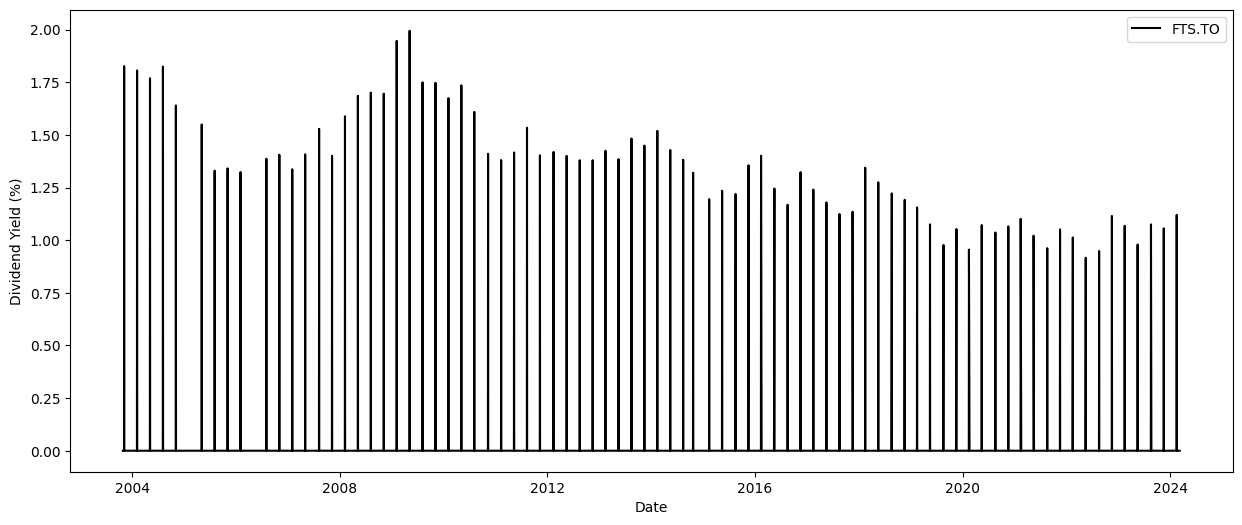

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.569648
share_price      1.000000
Name: share_price, dtype: float64


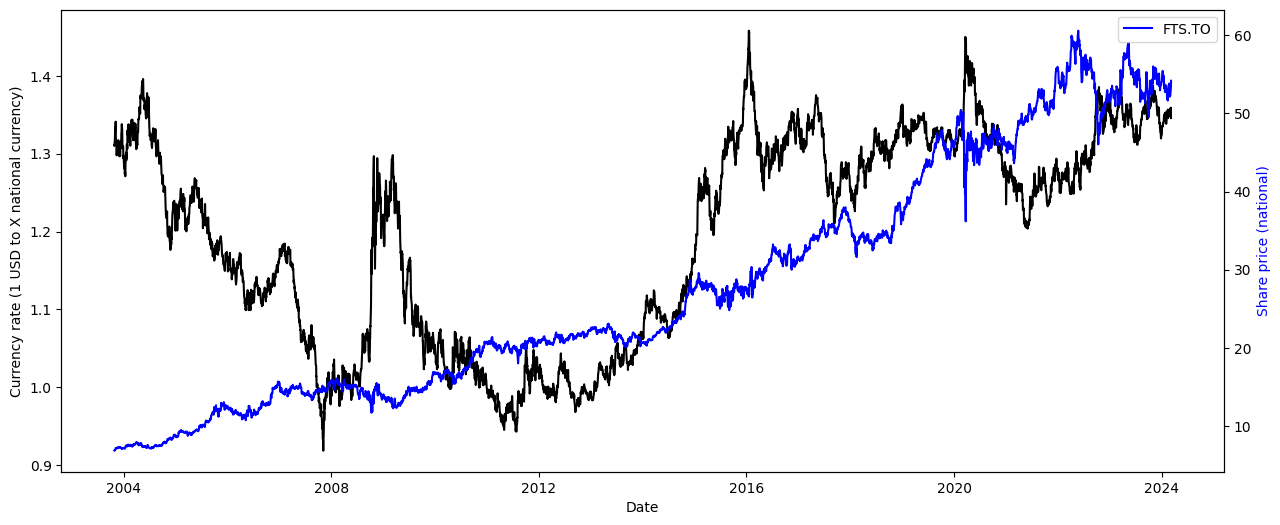

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

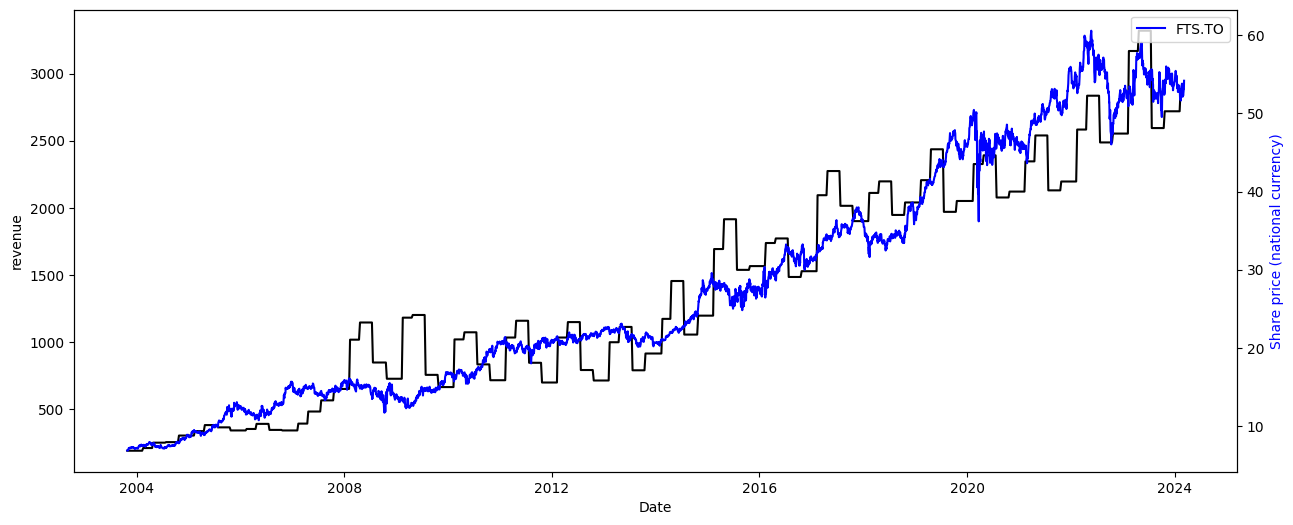

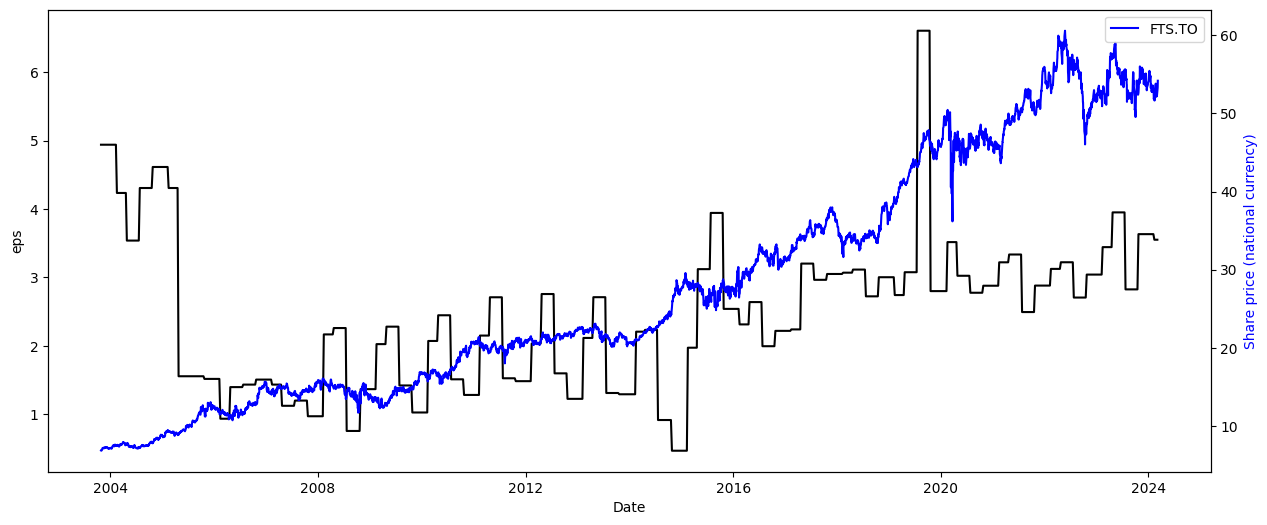

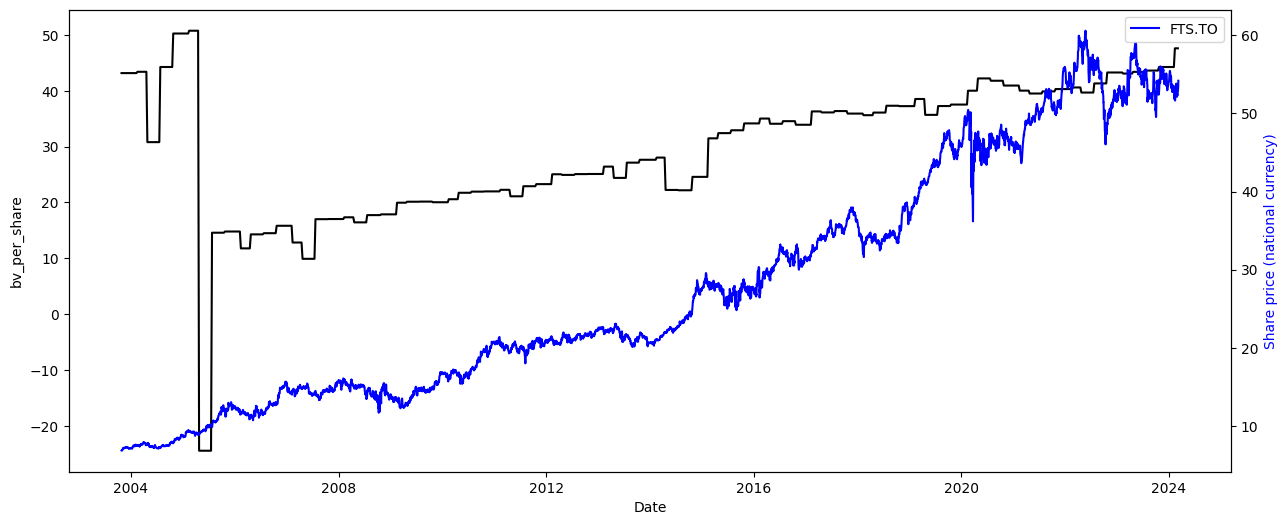

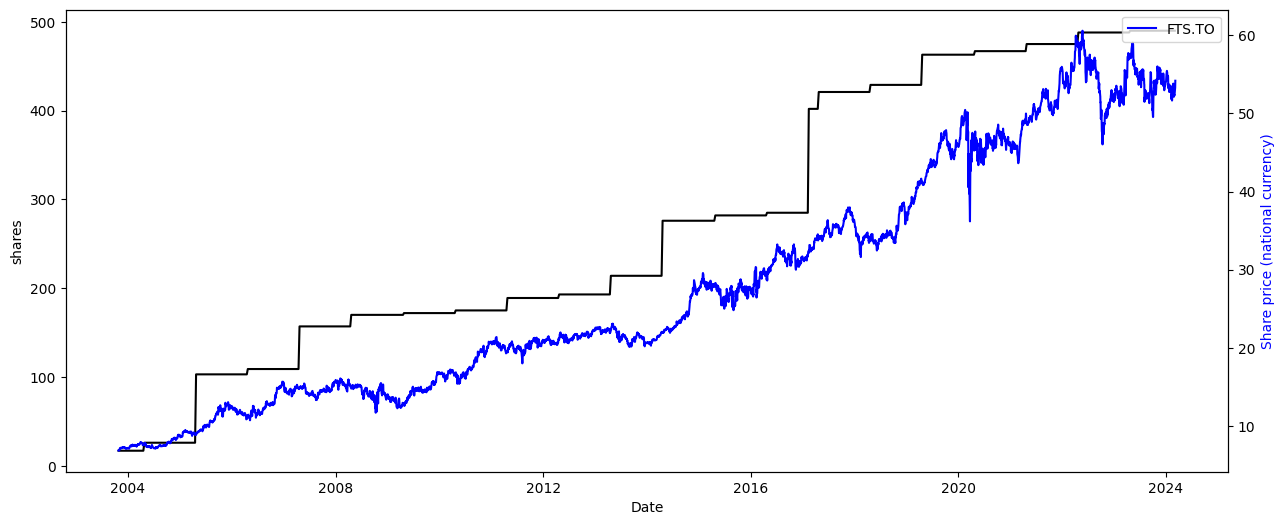

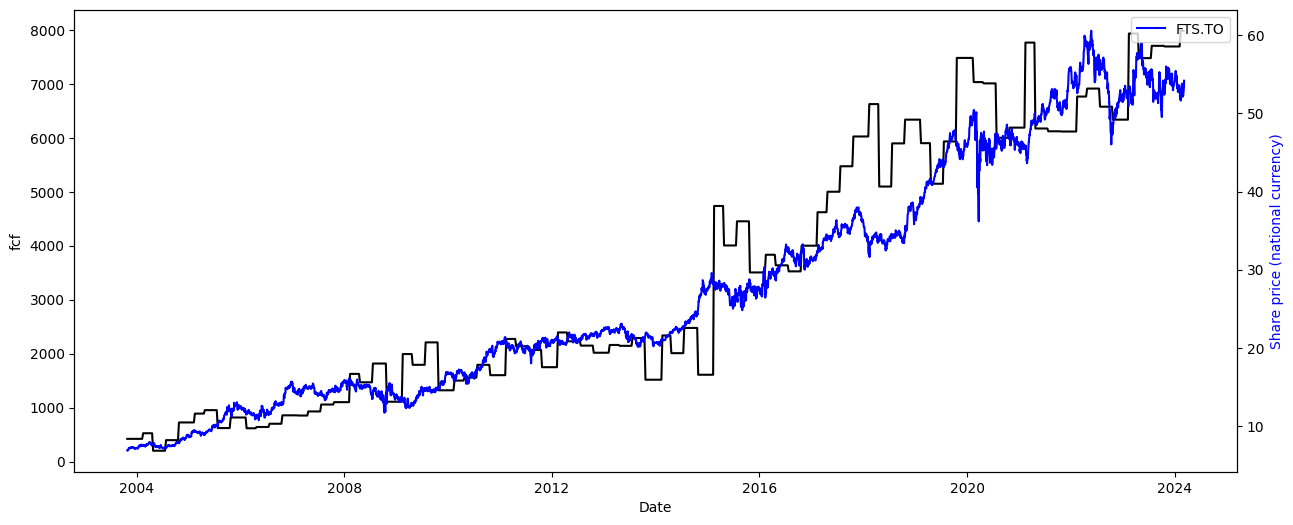

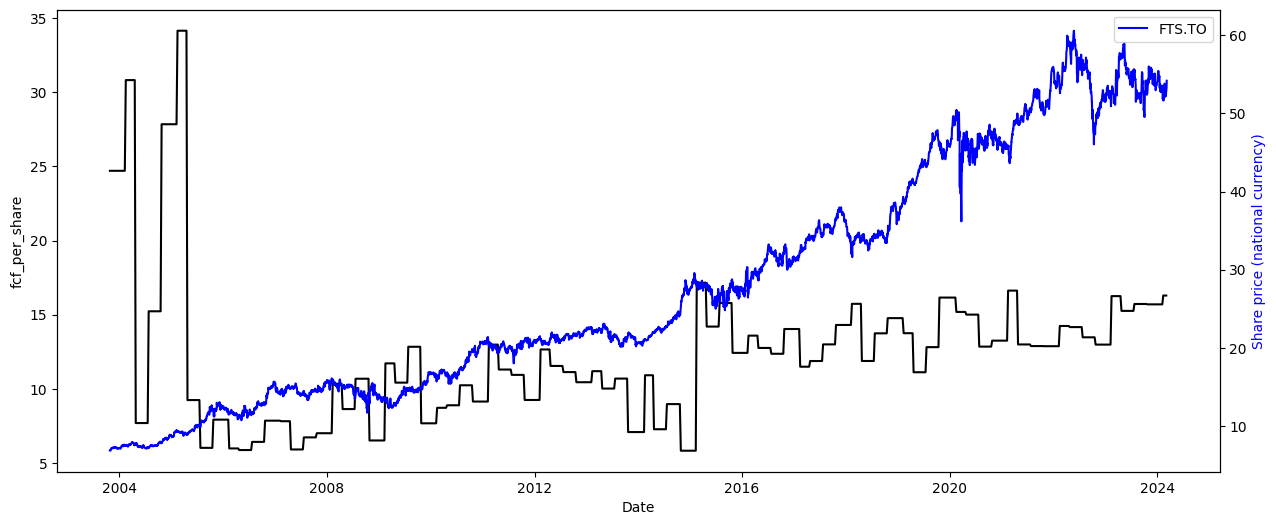

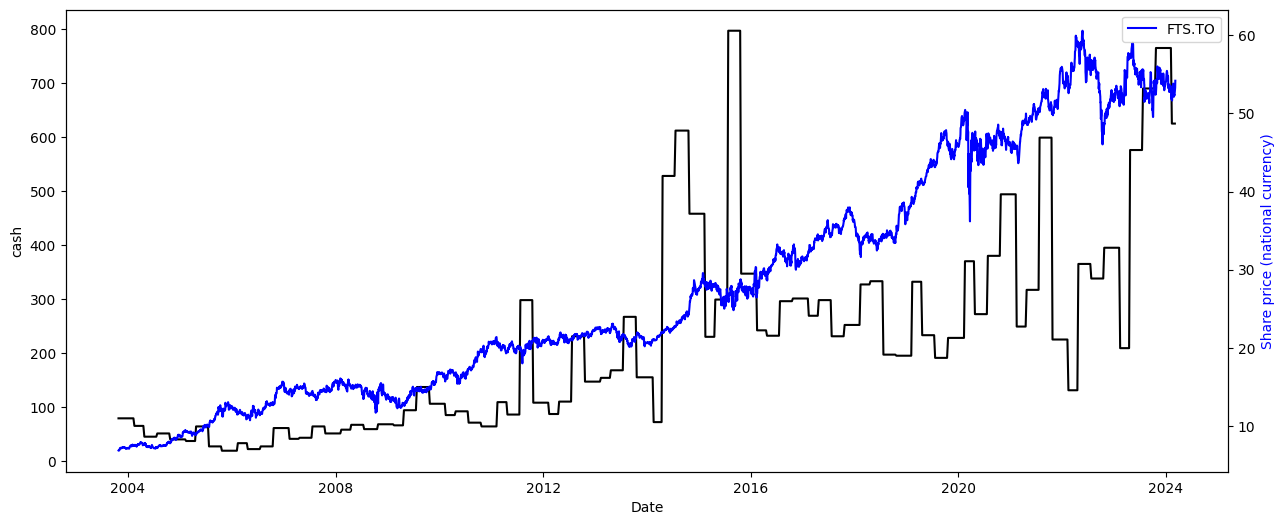

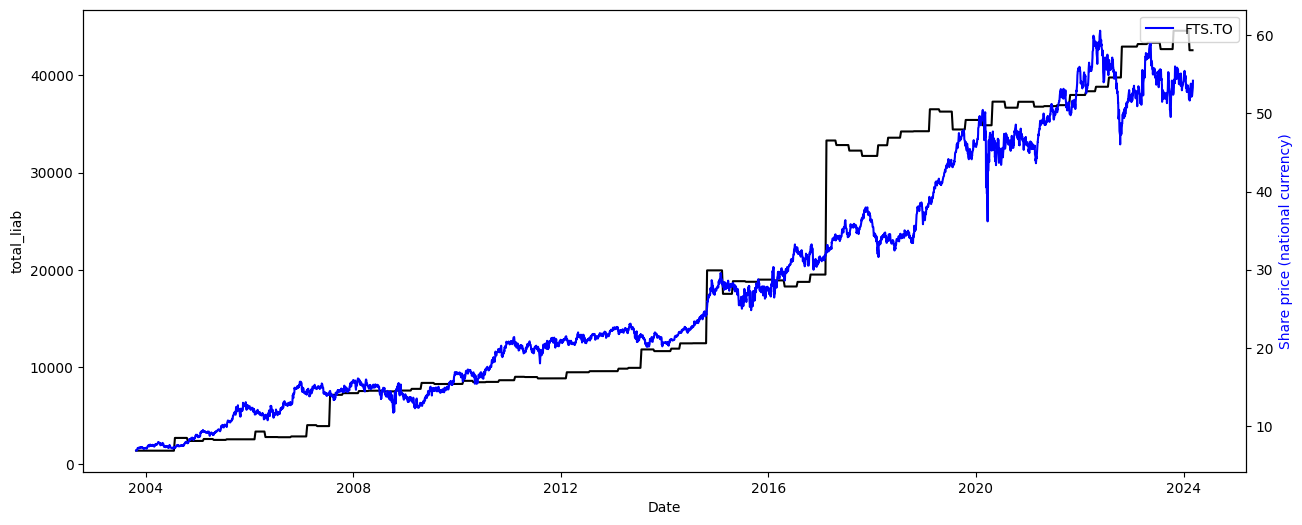

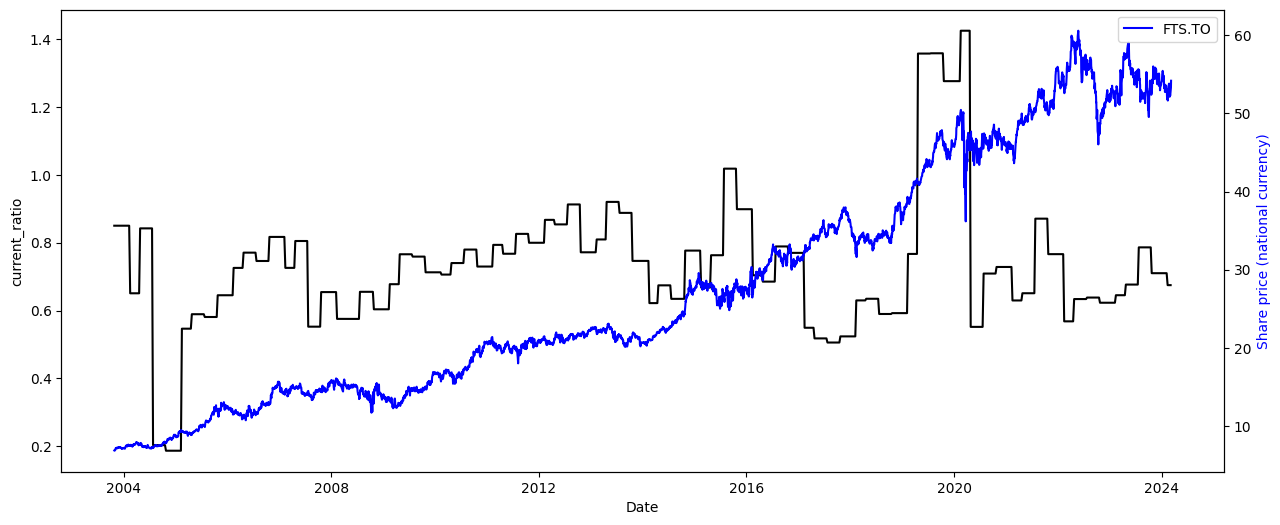

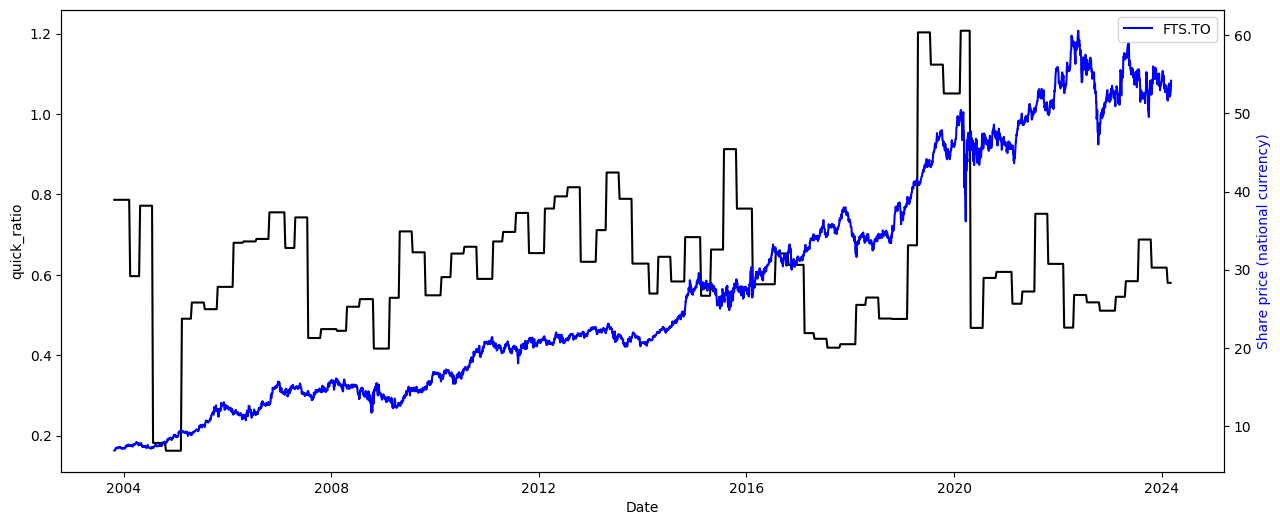

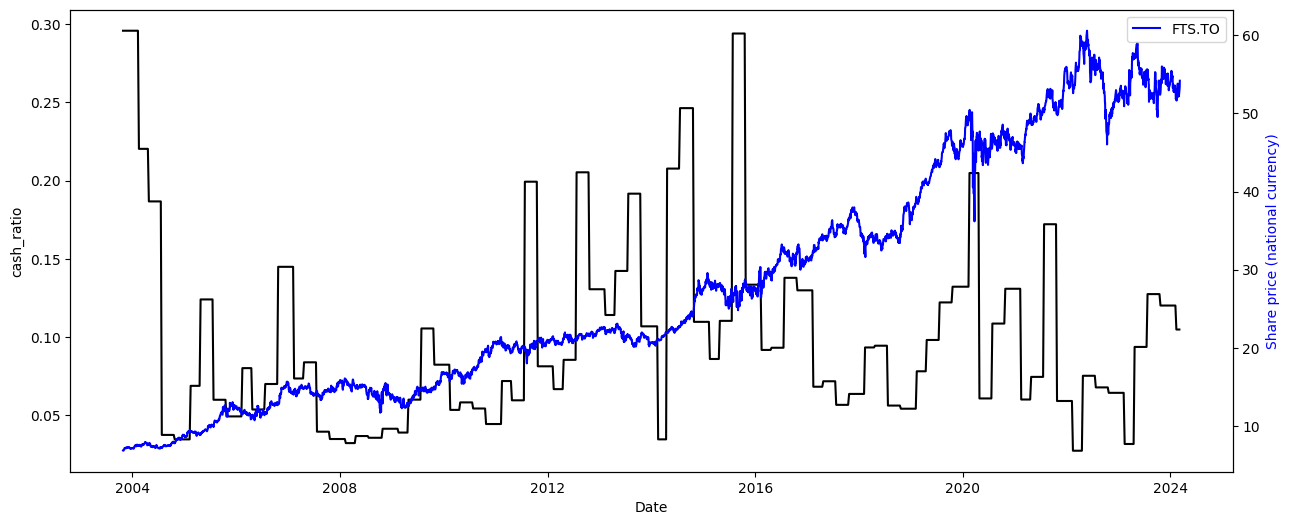

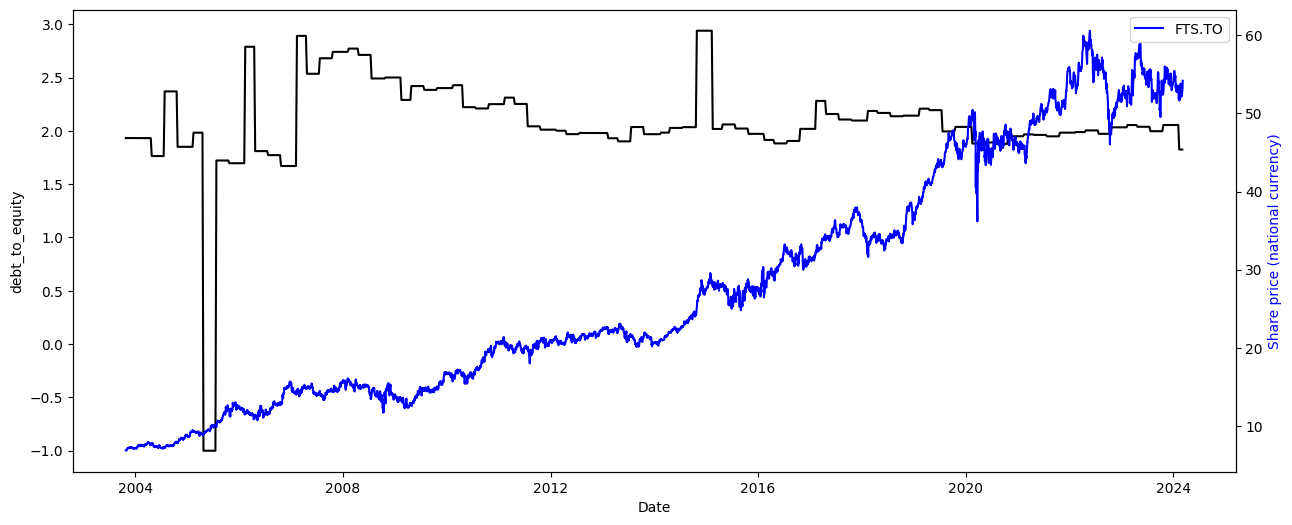

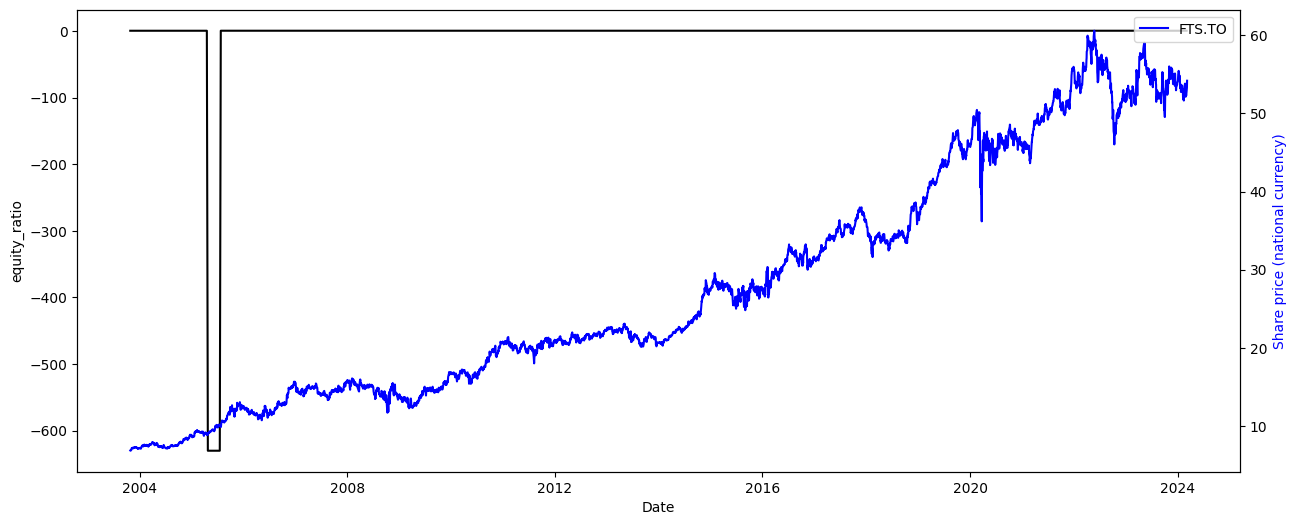

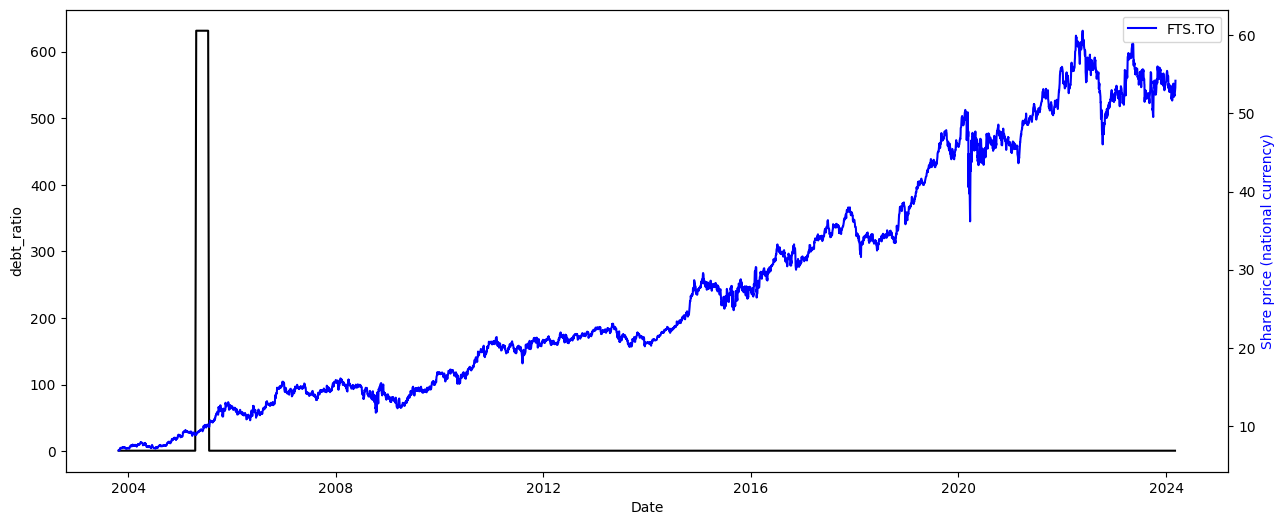

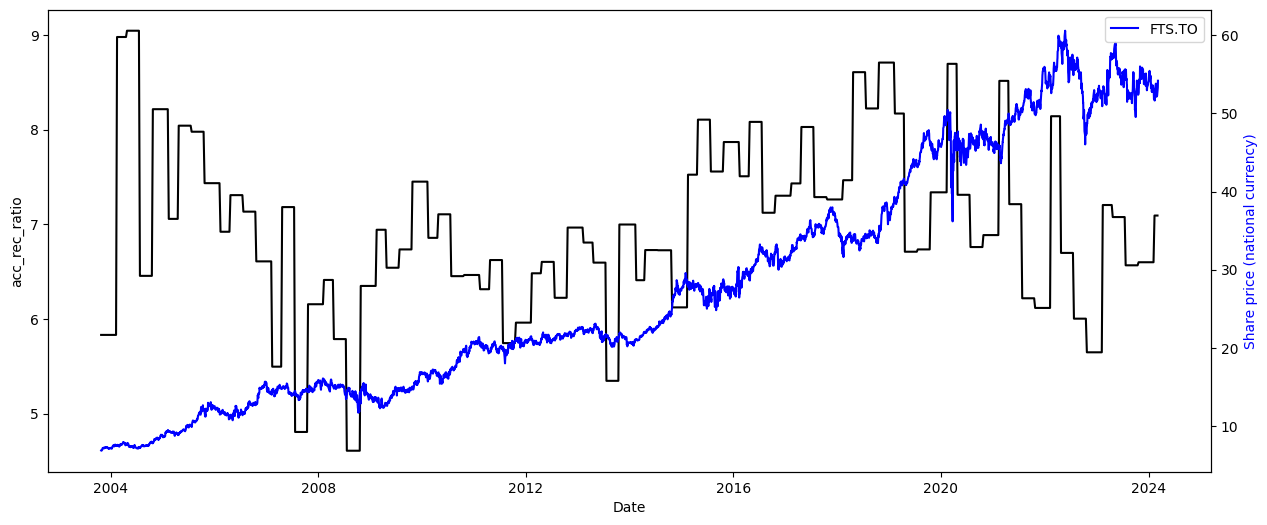

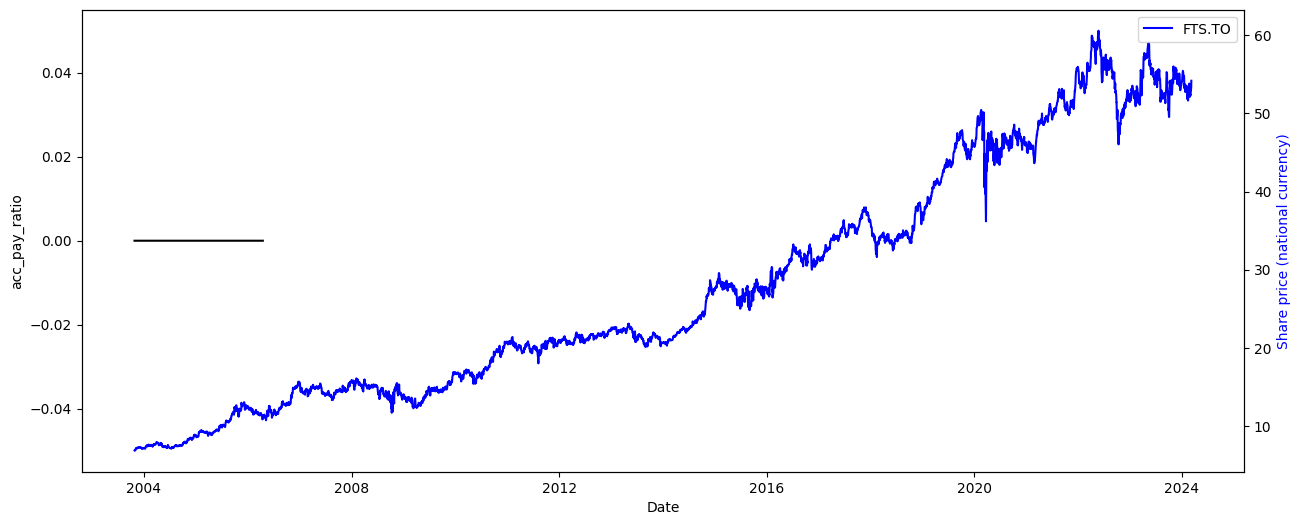

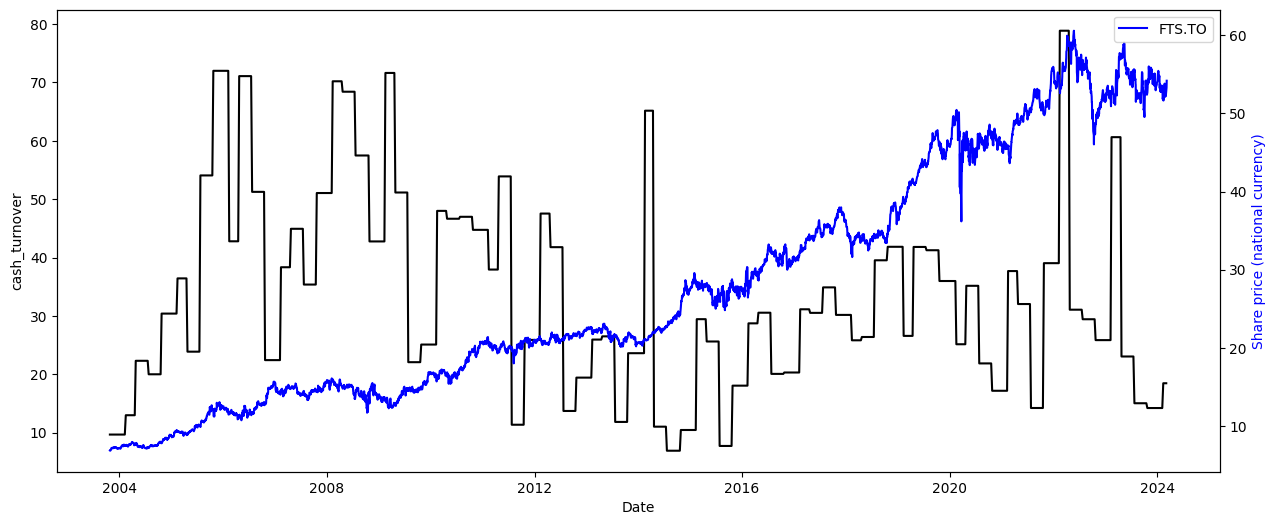

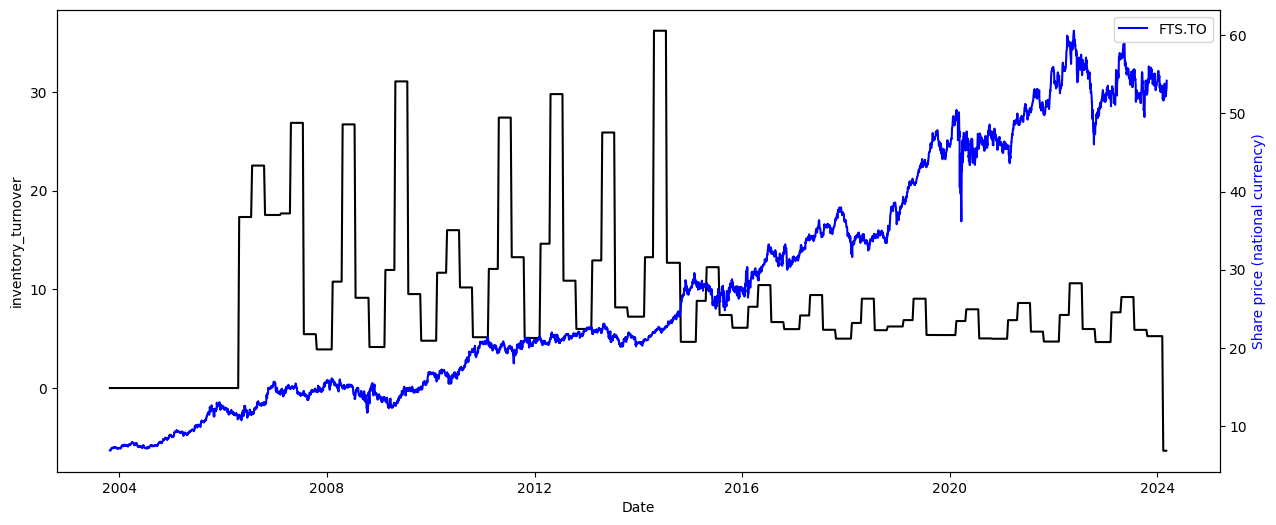

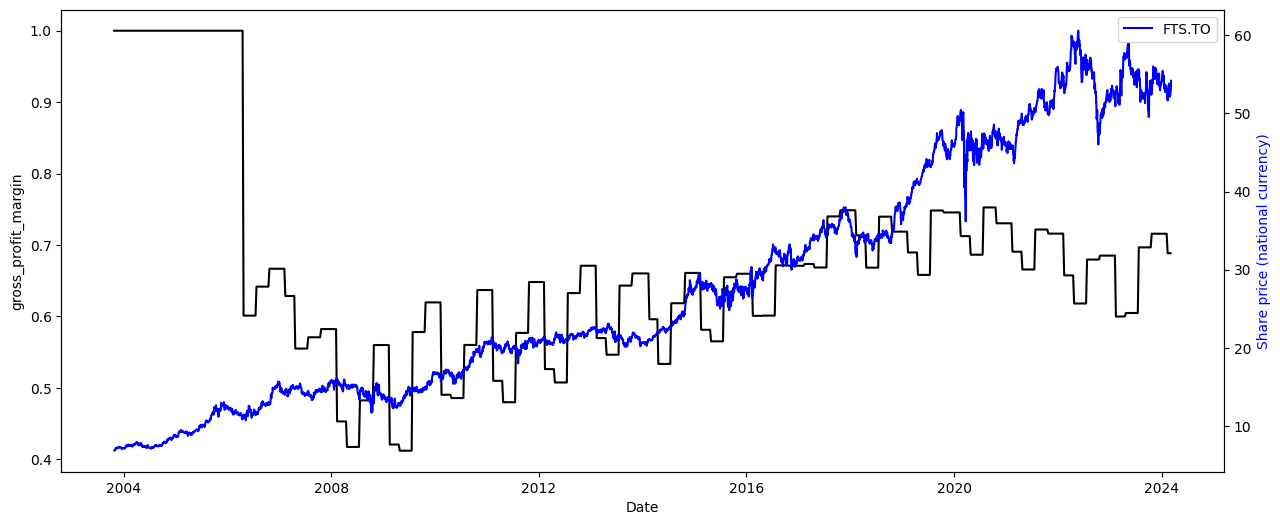

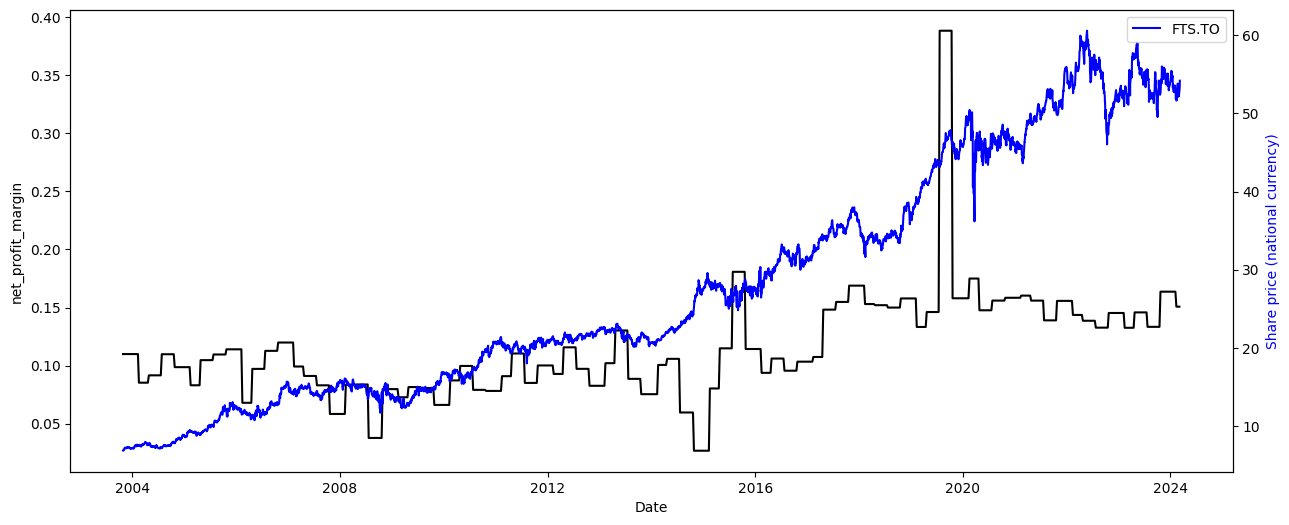

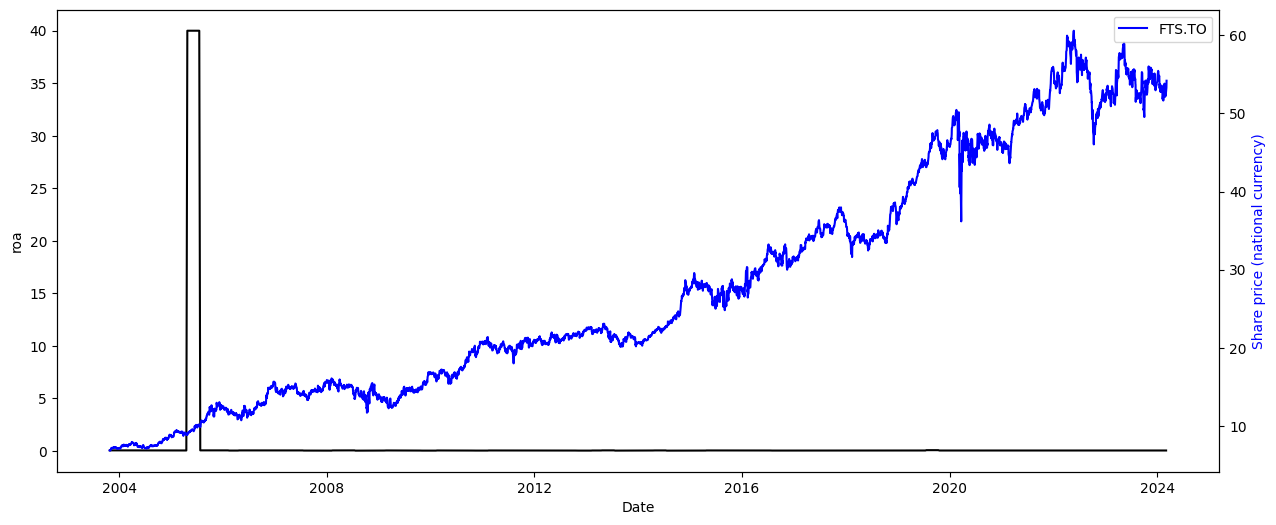

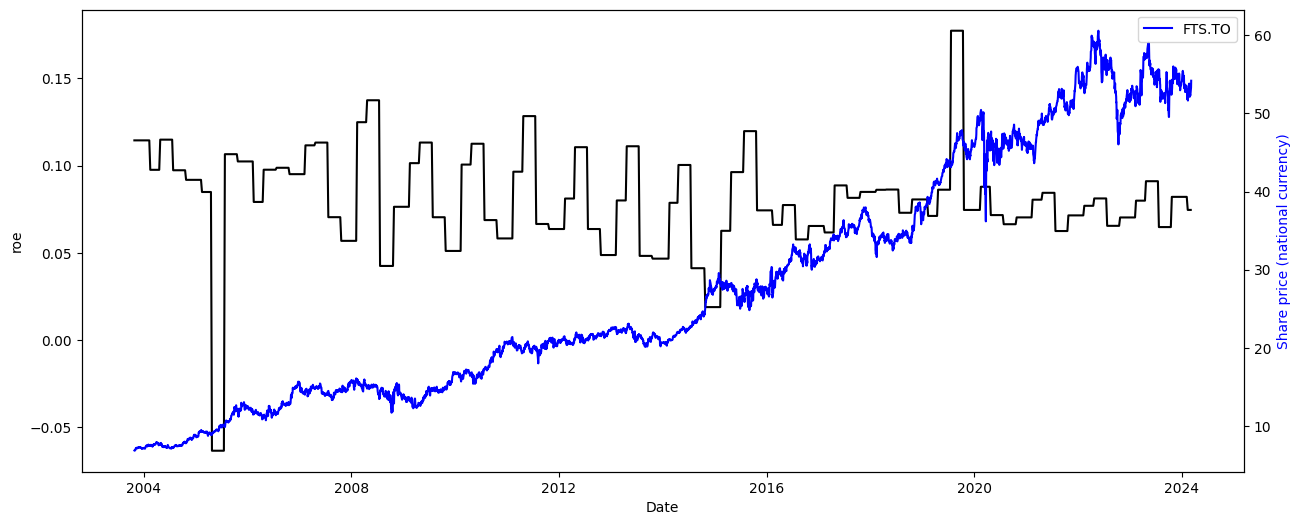

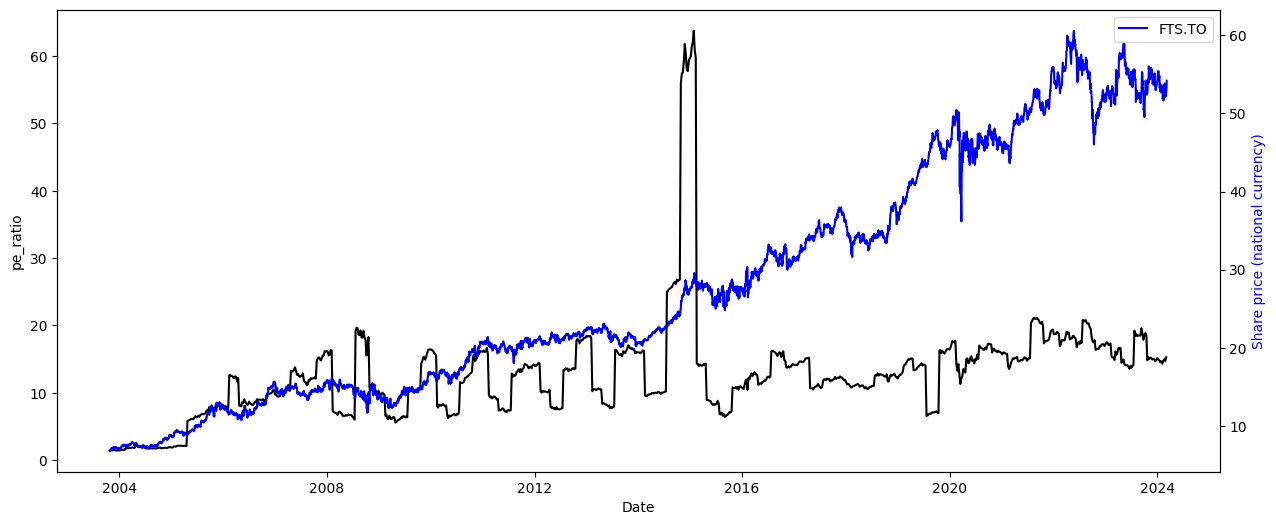

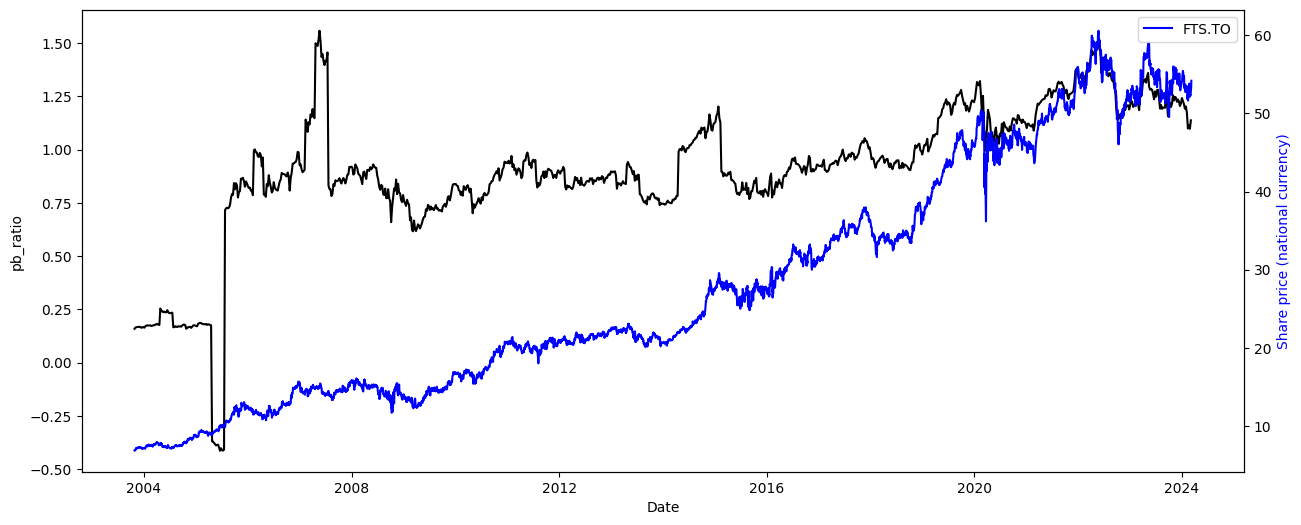

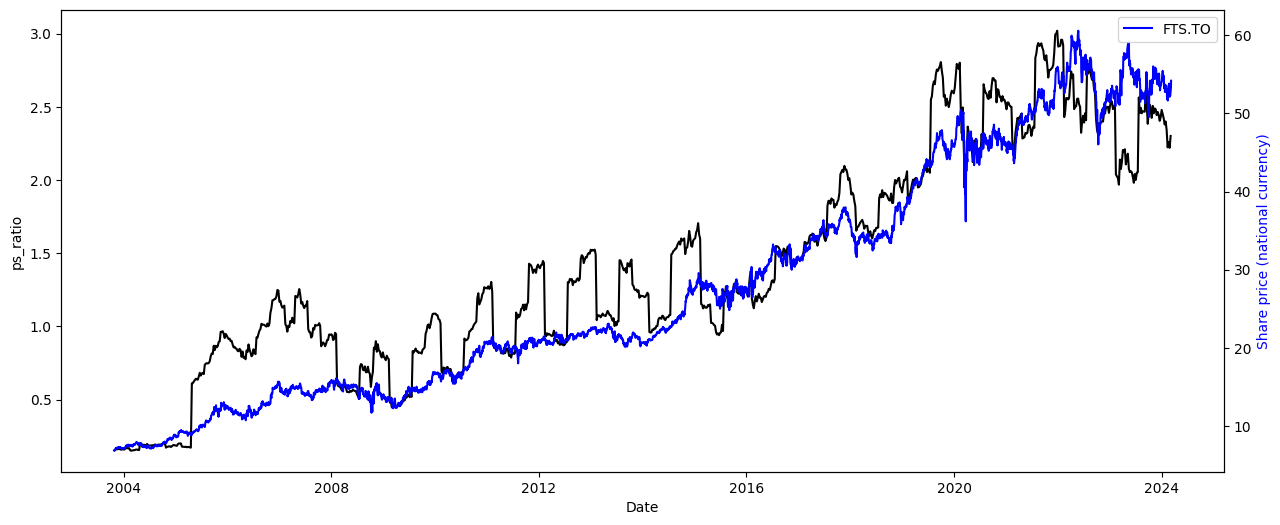

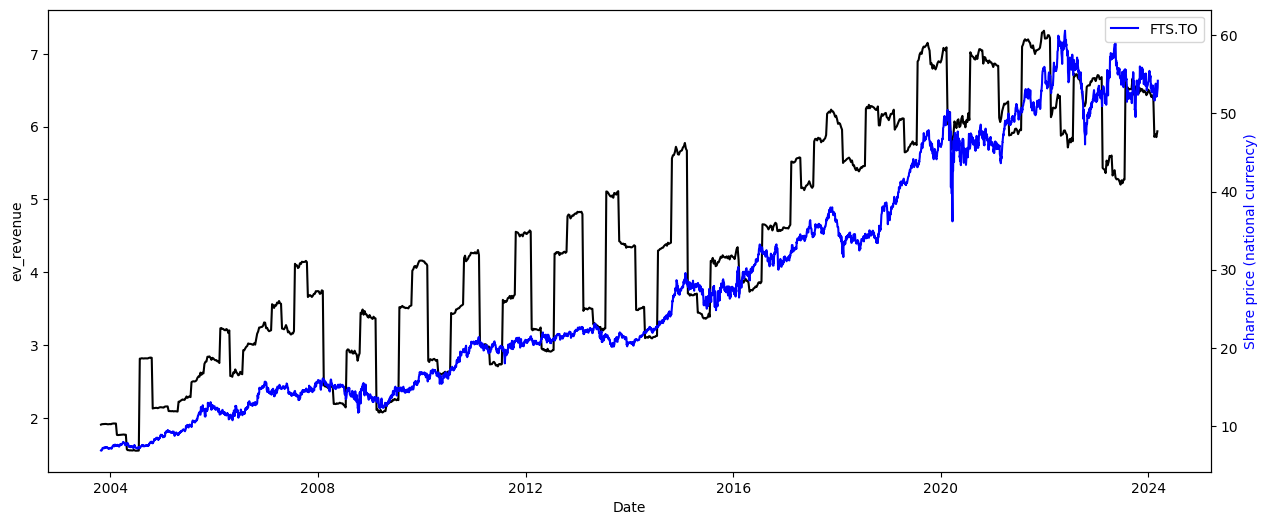

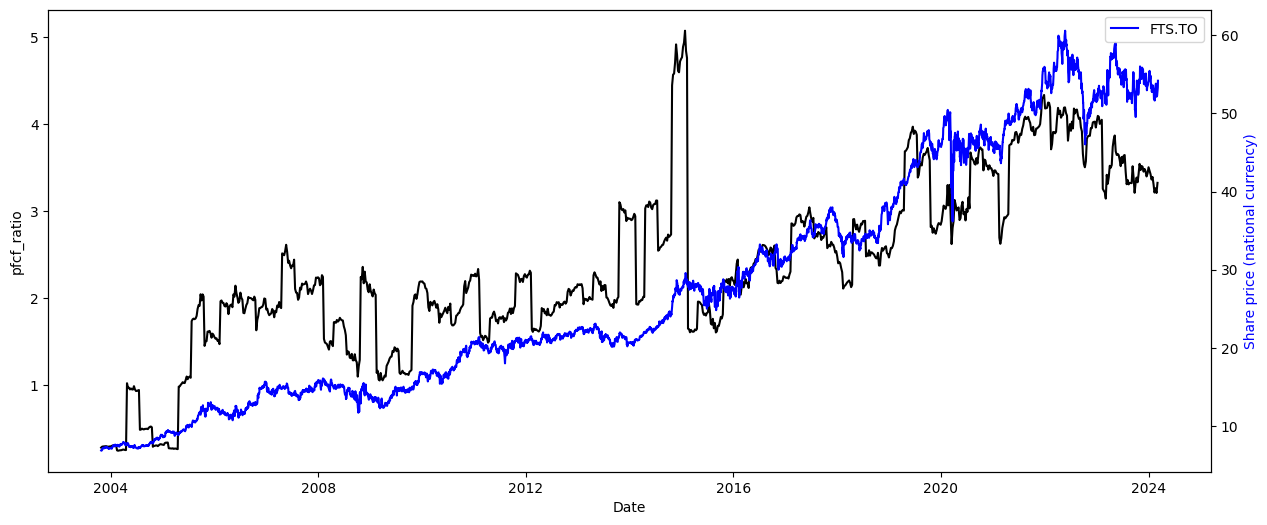

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

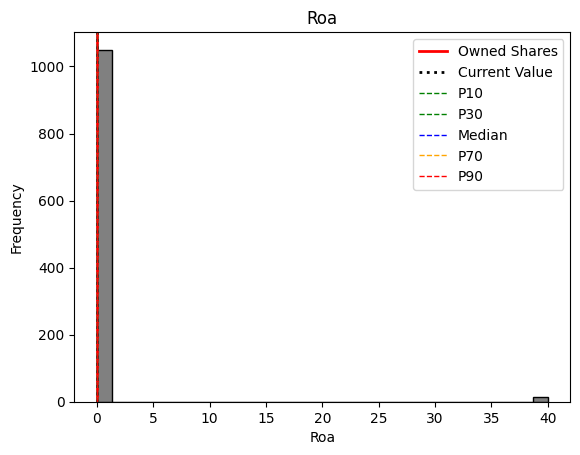

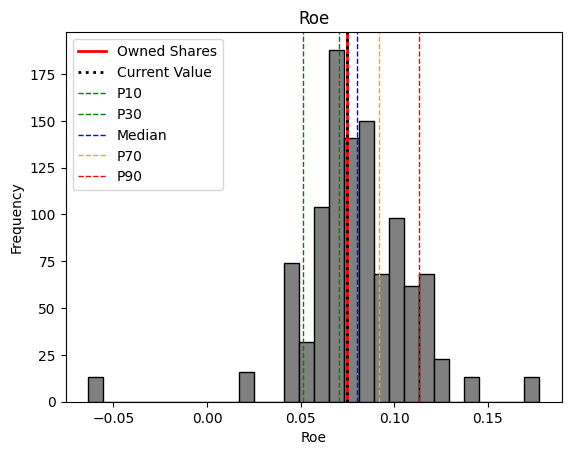

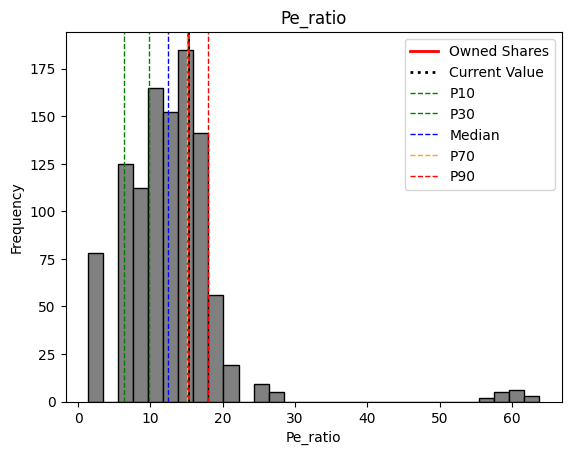

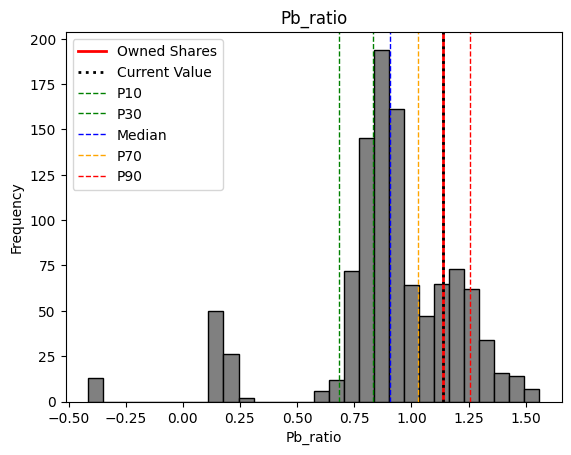

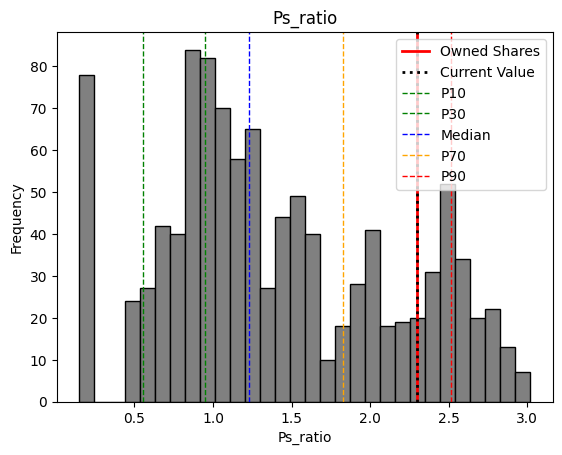

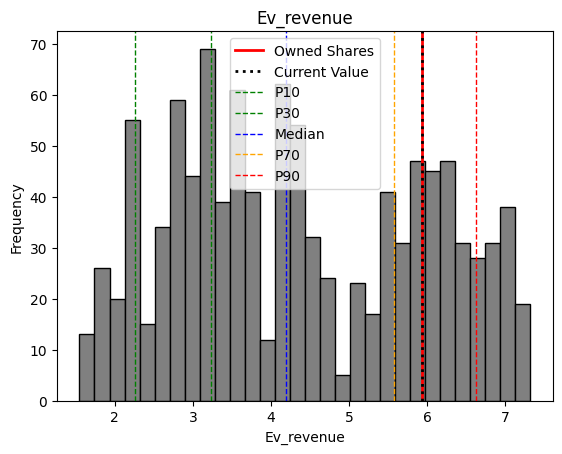

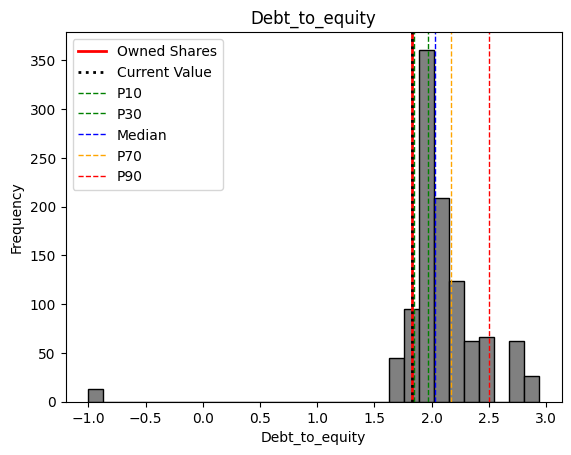

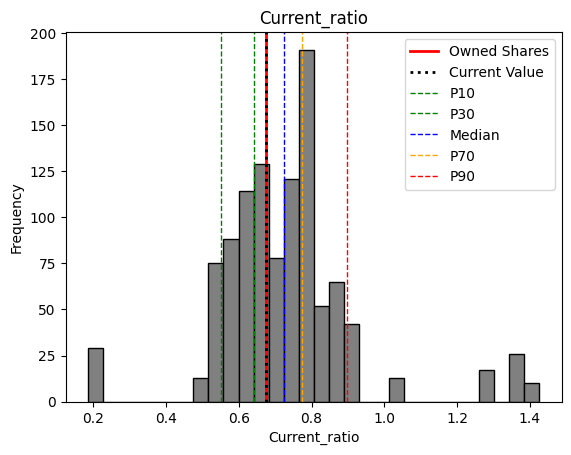

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,-0.545061,-0.096766,-0.461996,-0.114480,-0.149360,-0.781186,-0.079913
roe,-0.545061,1.000000,-0.519900,0.135882,-0.155296,-0.217243,0.382503,0.161620
pe_ratio,-0.096766,-0.519900,1.000000,0.513101,0.485056,0.525425,0.249225,0.108594
pb_ratio,-0.461996,0.135882,0.513101,1.000000,0.785509,0.714361,0.392108,0.296564
ps_ratio,-0.114480,-0.155296,0.485056,0.785509,1.000000,0.967338,-0.053907,0.269735
ev_revenue,-0.149360,-0.217243,0.525425,0.714361,0.967338,1.000000,0.033737,0.210756
debt_to_equity,-0.781186,0.382503,0.249225,0.392108,-0.053907,0.033737,1.000000,-0.024737
current_ratio,-0.079913,0.161620,0.108594,0.296564,0.269735,0.210756,-0.024737,1.000000


205 timestemos have been found!


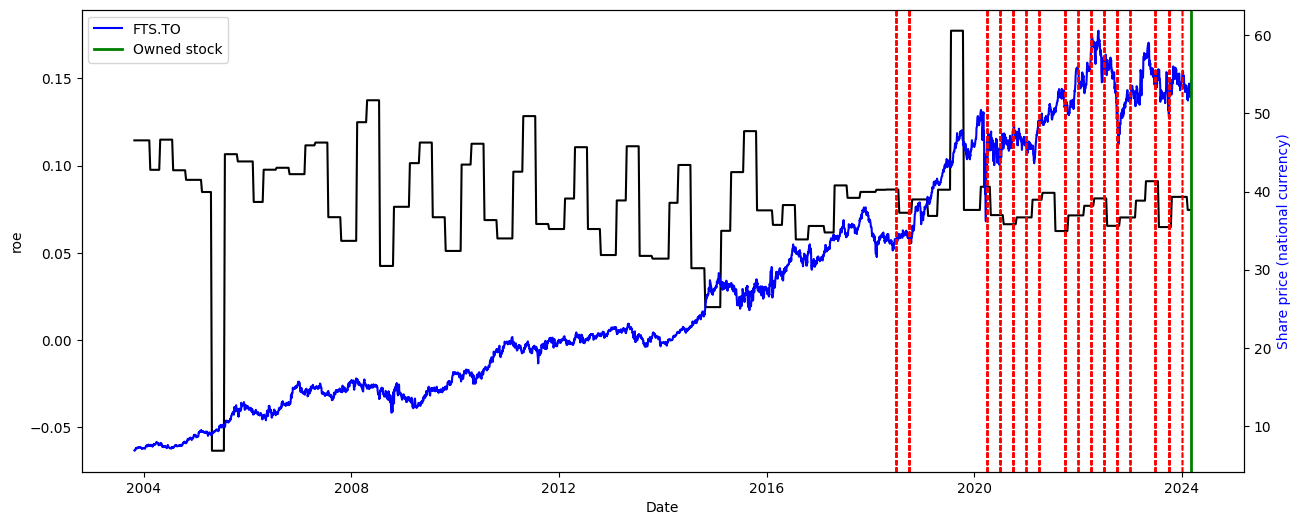

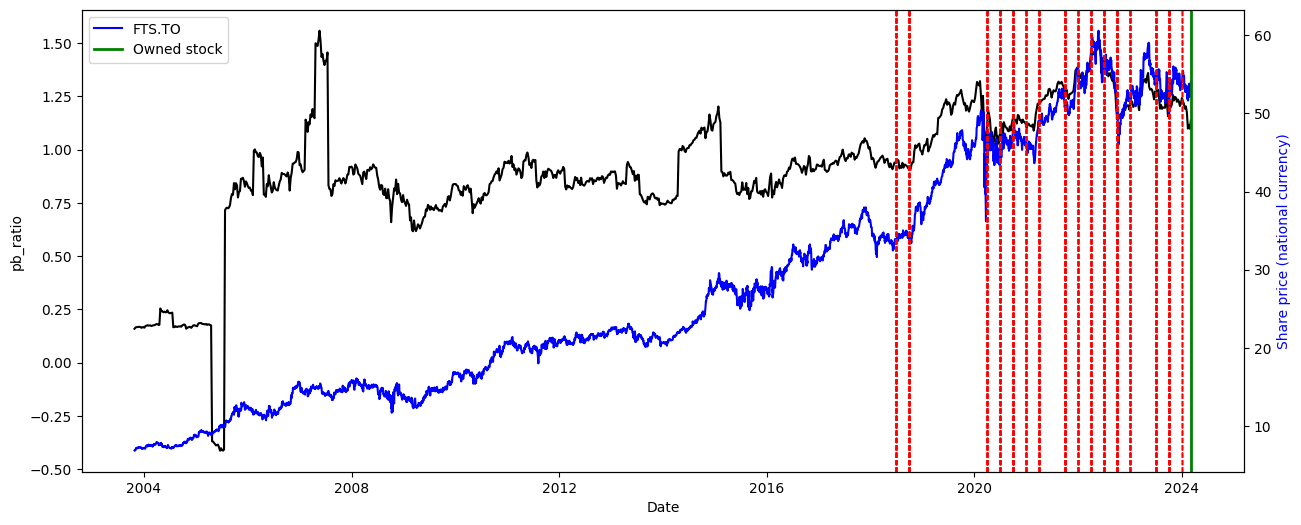

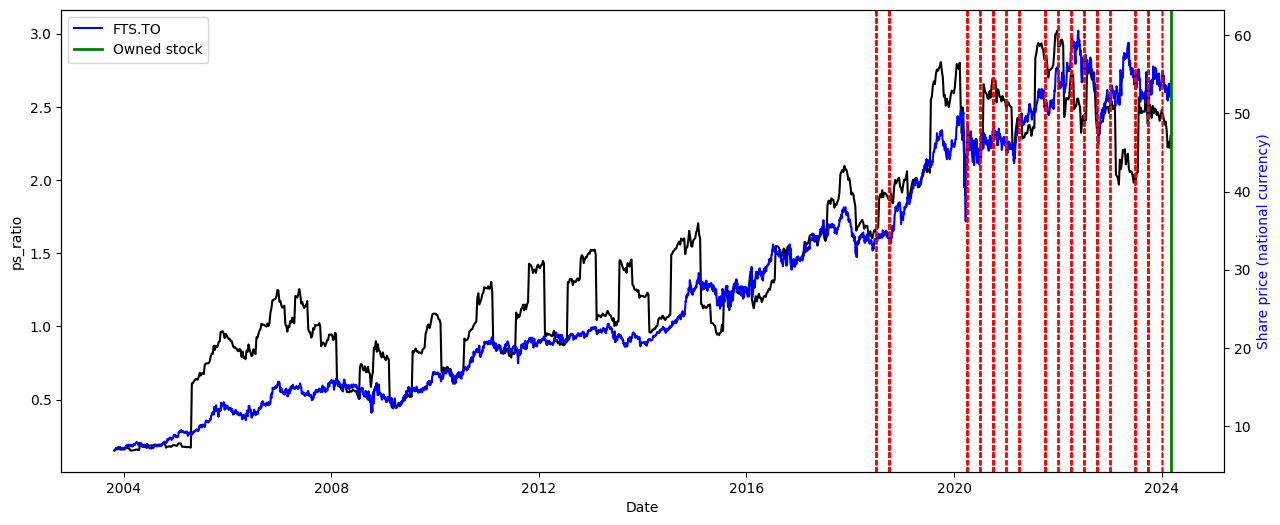

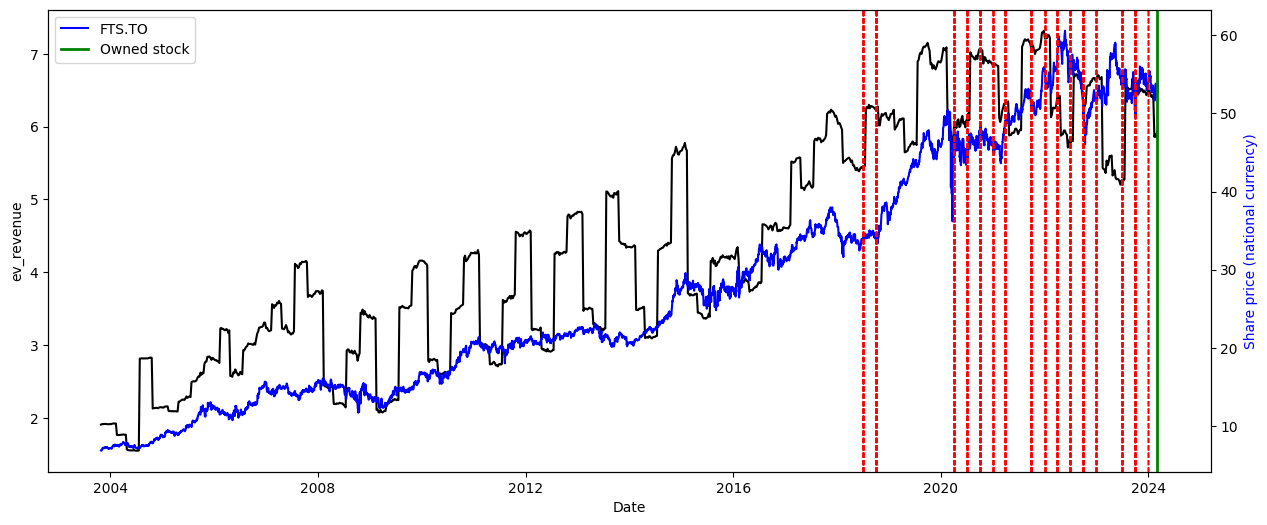

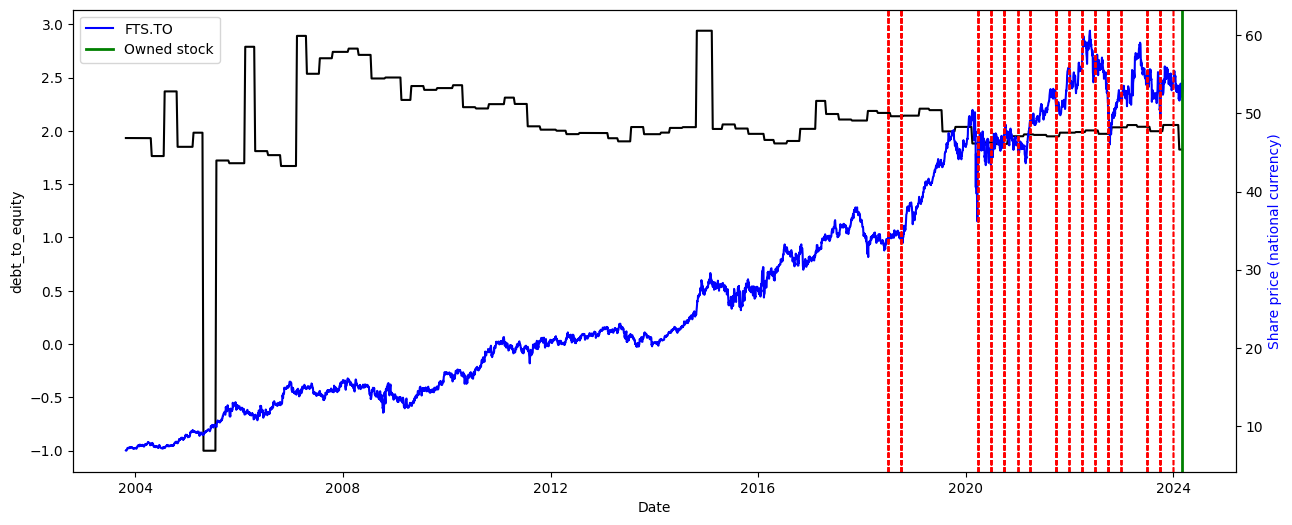

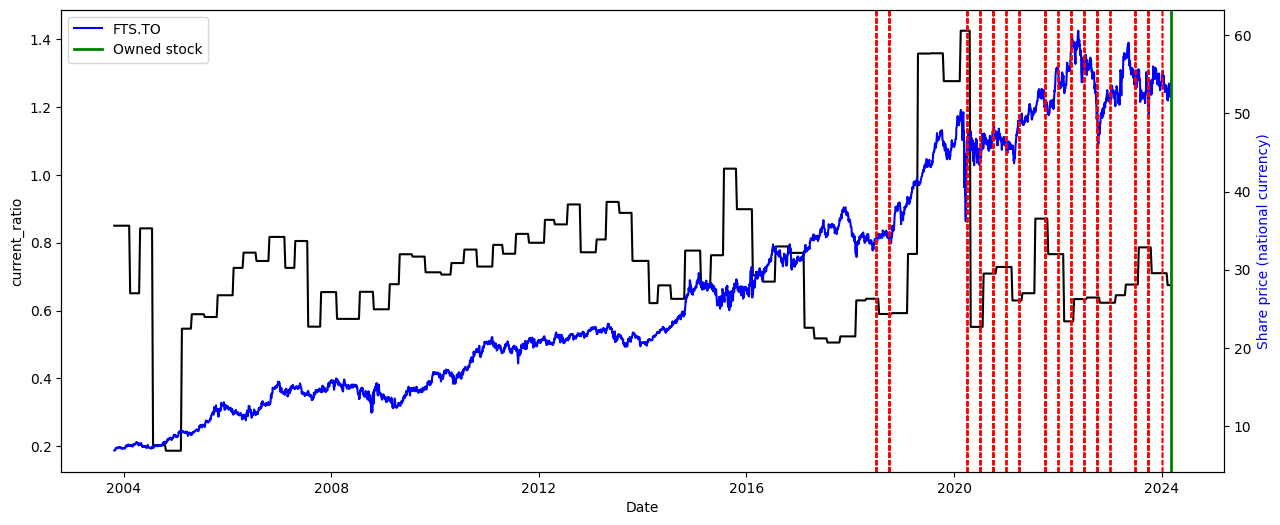

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )